# Buffon's Needle

In this notebook, we'll develop a "needle" class and use it to compare the result with the theoretical result. There is a great description of the problem in the wikipedia entry.

https://en.wikipedia.org/wiki/Buffon%27s_needle

In [1]:
# Package management
import math
import random
import matplotlib.pyplot as plt

The needle class will represent an individual needle. Each instance will have unique $x$ and $y$ coordinates of the center of mass as well as an angle, $\theta$, relative to the $x$-axis. The needle will also have a length.

The needle has methods crosscheck and endpoints:

needle.crosscheck() will evaluate whether the needle is crossing a grid line and return a boolean.

needle.endpoints() will return the $x,y$ coordinates of the endpoints for plotting.


In [2]:
class needle:

    def __init__(self):
        self.x = random.random()*10.0
        self.y = random.random()*10.0
        self.theta = random.random()*2*math.pi
        self.length = 1.0

        
    def crosscheck(self):
        # This method checks to see if the needle
        # crosses the closest line.

        # Find closest line
        close_line = round(self.y)
        
        # Calculate projection along y-axis
        y_proj = math.sin(self.theta)*self.length/2

        # Check for crossing.  If the projection is greater
        # than the distance from the closest line then the 
        # needle crosses.
        
        if math.fabs(y_proj) >= math.fabs(self.y - close_line):
            cross = 1
        else:
            cross = 0

        return cross



    def endpoints(self):

        # This method uses basic trigonometry to
        # calculate the endpoints of the needle.
        x_proj = math.cos(self.theta)*self.length/2
        y_proj = math.sin(self.theta)*self.length/2
        x =  [self.x + x_proj, self.x - x_proj]
        y =  [self.y + y_proj, self.y - y_proj]
        pts = [x,y]

        return pts

Let's test out the needle class with a basic simulation. We'll drop a few needles and plot them on a grid, color coordinating needles that cross and needles that don't.


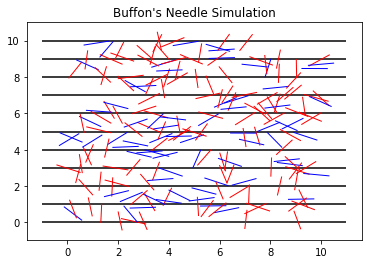

In [3]:
hit = 0
for i in range(200):

    # Instantiate needle
    n = needle()

    # Get the endpoints
    pts = n.endpoints()

    # Check for crossing and color code plot
    if n.crosscheck():
        hit = hit + 1
        plt.plot(pts[0],pts[1], c='red', linewidth = 1)
    else: 
        plt.plot(pts[0],pts[1], c='blue', linewidth = 1)

# Format plot 
ygrid = range(0,11)
plt.hlines(ygrid,-1,11) 
plt.axis('on')
plt.title('Buffon\'s Needle Simulation')
plt.show()

# Compute the probability 

In [4]:
prob = hit / 200
print(prob)

0.645


# Compute the error

In [5]:
actual_result = 2 / math.pi
error = math.fabs(actual_result - prob) / actual_result
print(error * 100)

1.3163630782708284


# Run the simulation for 5 different rounds and observe the result.

In [6]:
rounds = [500, 1000, 5000, 10000, 100000]
print("Total \t Hit \t Probability \t Error" )
for round_count in rounds: 
    hit = 0
    for i in range(round_count):

        # Instantiate needle
        n = needle()

        # Check for crossing 
        if n.crosscheck():
            hit = hit + 1
        
    prob = hit / round_count
    error = math.fabs(actual_result - prob) / actual_result
    print(round_count,'\t',hit,'\t',prob,'\t',error*100)
    
    

Total 	 Hit 	 Probability 	 Error
500 	 318 	 0.636 	 0.09735361584457966
1000 	 646 	 0.646 	 1.4734427109503183
5000 	 3188 	 0.6376 	 0.15397379644259354
10000 	 6353 	 0.6353 	 0.20730935872022774
100000 	 63426 	 0.63426 	 0.370672176706886
